170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step


/usr/local/lib/python3.12/dist-packages/keras/src/layers/convolutional/base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 50ms/step - accuracy: 0.2549 - loss: 1.9993 - val_accuracy: 0.4868 - val_loss: 1.4251
Epoch 2/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.5086 - loss: 1.3665 - val_accuracy: 0.5707 - val_loss: 1.2015
Epoch 3/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6005 - loss: 1.1285 - val_accuracy: 0.5987 - val_loss: 1.1438
Epoch 4/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 41s 50ms/step - accuracy: 0.6464 - loss: 1.0125 - val_accuracy: 0.6496 - val_loss: 1.0104
Epoch 5/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 40s 49ms/step - accuracy: 0.6795 - loss: 0.9126 - val_accuracy: 0.6182 - val_loss: 1.1248
Epoch 6/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 38s 49ms/step - accuracy: 0.7056 - loss: 0.8379 - val_accuracy: 0.6622 - val_loss: 0.9672
Epoch 7/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 42s 51ms/step - accuracy: 0.7335 - loss: 0.7578 - val_accuracy: 0.6615 - val_loss: 1.0096
Epoch 8/10
782/782 ━━━━━━━━━━━━━━━━━━━━ 39s 50ms/step - accuracy: 0.7572 - loss: 0.6987 - 

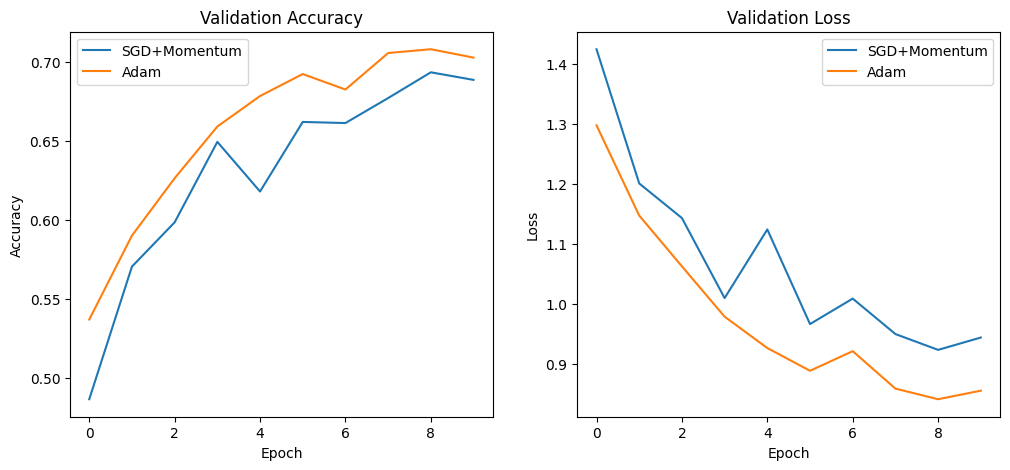

SGD+Momentum -> Accuracy: 0.6888, Loss: 0.9447
Adam -> Accuracy: 0.7029, Loss: 0.8562


In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt

# 1. Load CIFAR-10 dataset
(X_train, y_train), (X_test, y_test) = datasets.cifar10.load_data()
X_train, X_test = X_train / 255.0, X_test / 255.0  # Normalize

# 2. Define CNN model
def build_cnn():
    model = models.Sequential([
        layers.Conv2D(32, (3,3), activation='relu', input_shape=(32,32,3)),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.MaxPooling2D((2,2)),
        layers.Conv2D(64, (3,3), activation='relu'),
        layers.Flatten(),
        layers.Dense(64, activation='relu'),
        layers.Dense(10, activation='softmax')
    ])
    return model

# 3. Train with SGD + Momentum
model_sgd = build_cnn()
model_sgd.compile(optimizer=tf.keras.optimizers.SGD(learning_rate=0.01, momentum=0.9),
                  loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_sgd = model_sgd.fit(X_train, y_train, epochs=10, batch_size=64,
                            validation_data=(X_test, y_test), verbose=1)

# 4. Train with Adam
model_adam = build_cnn()
model_adam.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                   loss='sparse_categorical_crossentropy', metrics=['accuracy'])
history_adam = model_adam.fit(X_train, y_train, epochs=10, batch_size=64,
                              validation_data=(X_test, y_test), verbose=1)

# 5. Compare performance
plt.figure(figsize=(12,5))

# Accuracy comparison
plt.subplot(1,2,1)
plt.plot(history_sgd.history['val_accuracy'], label='SGD+Momentum')
plt.plot(history_adam.history['val_accuracy'], label='Adam')
plt.title('Validation Accuracy')
plt.xlabel('Epoch')
plt.ylabel('Accuracy')
plt.legend()

# Loss comparison
plt.subplot(1,2,2)
plt.plot(history_sgd.history['val_loss'], label='SGD+Momentum')
plt.plot(history_adam.history['val_loss'], label='Adam')
plt.title('Validation Loss')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

plt.show()

# 6. Final evaluation
sgd_loss, sgd_acc = model_sgd.evaluate(X_test, y_test, verbose=0)
adam_loss, adam_acc = model_adam.evaluate(X_test, y_test, verbose=0)

print(f"SGD+Momentum -> Accuracy: {sgd_acc:.4f}, Loss: {sgd_loss:.4f}")
print(f"Adam -> Accuracy: {adam_acc:.4f}, Loss: {adam_loss:.4f}")